# 1. Import and Install Dependencies

In [1]:
# %pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib
# choose versions that match the CUDA/cuDNN versions installed on your system

In [36]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
# need to launch VS Code as Administrator to use mediapipe?

camera_index = 0

# 2. Draw Keypoints using MP Holistic

In [3]:
"""
We first need to draw the landmarks and connections on the image. To do this, we will use the drawing utilities provided by MediaPipe.

mp_holistic = mp.solutions.holistic, is creating an instance of the Holistic model provided by MediaPipe. The Holistic model is designed to perform simultaneous detection of body language signals from a person's face, hands, and pose. This includes facial landmarks, hand landmarks, and pose landmarks (33 3D body landmarks), providing a holistic view of body language in real-time.

mp_drawing = mp.solutions.drawing_utils, is creating an instance of the drawing utilities provided by MediaPipe. These utilities are used to draw the landmarks and connections that are detected by the various MediaPipe models. For example, if the Holistic model detects a person's pose, the drawing utilities can be used to draw the pose landmarks on an image.
"""

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR to RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction using MediaPipe Holistic model
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB to BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
# TESTING webcam feed

# webcam image all black? change the camera index to change the camera
cap = cv2.VideoCapture(camera_index)
# Set mediapipe model
# min_detection_confidence and min_tracking_confidence are the minimum confidence values for the detection and tracking of keypoints. If the confidence value is lower than the specified threshold, the detection or tracking is considered a failure and the corresponding landmarks are not returned.
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('t'):
            break
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

c:\Users\Cr4sZ\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results.face_landmarks

landmark {
  x: 0.409710497
  y: 0.471889943
  z: -0.028126983
}
landmark {
  x: 0.411496937
  y: 0.426519066
  z: -0.0502833202
}
landmark {
  x: 0.408821881
  y: 0.441520125
  z: -0.0268882569
}
landmark {
  x: 0.398330539
  y: 0.386837244
  z: -0.038794402
}
landmark {
  x: 0.411052495
  y: 0.413167626
  z: -0.0533272736
}
landmark {
  x: 0.408918858
  y: 0.396762758
  z: -0.0493679717
}
landmark {
  x: 0.402457267
  y: 0.359159499
  z: -0.02384145
}
landmark {
  x: 0.329076231
  y: 0.36645472
  z: 0.00192871469
}
landmark {
  x: 0.400059134
  y: 0.335005701
  z: -0.0177718271
}
landmark {
  x: 0.399430454
  y: 0.318609029
  z: -0.0193601232
}
landmark {
  x: 0.393407583
  y: 0.249226078
  z: -0.00686332816
}
landmark {
  x: 0.409813941
  y: 0.478584707
  z: -0.0269022807
}
landmark {
  x: 0.409321666
  y: 0.48381418
  z: -0.0237721149
}
landmark {
  x: 0.408546925
  y: 0.486142069
  z: -0.0194496457
}
landmark {
  x: 0.408932745
  y: 0.488351613
  z: -0.0184168052
}
landmark {
  x:

In [9]:
try:
    len(results.left_hand_landmarks.landmark)
except:
    pass

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

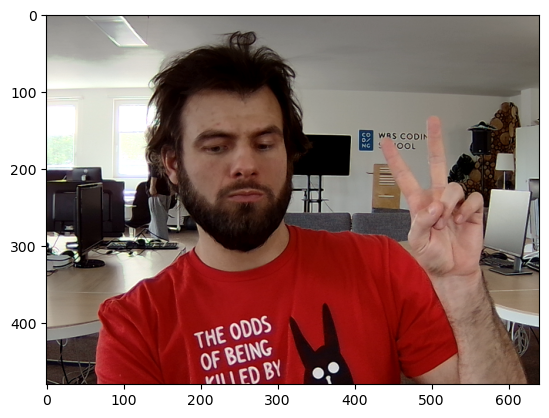

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
try:
    len(results.left_hand_landmarks.landmark)
except:
    pass

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, lh, rh, face])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.39482349,  0.42031819, -0.72824514, ...,  0.46454999,
        0.34710139,  0.02690619])

In [17]:
468*3+33*4+21*3+21*3

1662

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.39482349,  0.42031819, -0.72824514, ...,  0.46454999,
        0.34710139,  0.02690619])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
# actions = np.array(['yes', 'no', 'PeaceAmongWorlds'])
actions = np.array(['Hi', 'Yes', 'No', 'ThankYou', 'ILoveYou'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30

In [21]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [22]:
# actual recording
cap = cv2.VideoCapture(camera_index)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Flag variable to signal breaking out of all loops
    break_all_loops = False

    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Check if flag variable is set to break all loops
                if break_all_loops:
                    break

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                # Display messages and countdown
                # Apply wait logic with countdown
                if frame_num == 0:
                    for countdown in range(3, 0, -1):  # 3 seconds countdown
                        cv2.putText(image, f'GET READY FOR "{action}" in {countdown}', (30,100),
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0, 0), 4, cv2.LINE_AA)
                        # cv2.putText(image, f'Collecting frames for {action} Video Number {sequence+1}', (15,150),
                        #            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(1000)  # wait 1000 ms between each number
                        image = frame.copy()  # clear the previous text
                else:
                    cv2.putText(image, f'RECORDING [{sequence + 1}/{no_sequences}] "{action}" - Frame {frame_num + 1}/{sequence_length}', (30,100),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0, 255), 4, cv2.LINE_AA)
                    remaining_frames = sequence_length - frame_num - 1
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully - go to next frame
                if cv2.waitKey(10) & 0xFF == ord('t'):
                    # Set flag variable to break out of all loops
                    break

                # Break gracefully - kill all
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    # Set flag variable to break out of all loops
                    break_all_loops = True
                    break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [23]:
cap.release()
cv2.destroyAllWindows()